<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Demand%20Forecasting%20-%20Wine%20Store/Wine_Store_(Time_Series_Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Demand%20Forecasting%20-%20Wine%20Store/pexels-bottles.jpg" width="80%"></p>
<p align=center>Fonte: Pexels

Imagine you have a store and, you want to increase your sales, you would have to look back at your business, analyze your situation and, in the end, try to create plans with the analyzed information.

That's the purpose of this work - analyze the metrics of a wine store with the help of data science (Times Series, specifically) and find insights that may help to predict the demand, that is, Demand Forecasting. Demand forecasting is important and helpful because assays the willingness of a customer to buy a product at a given price.

Before diving into the analysis, let's first know the data. Here we have two datasets, the first one is about the wine information, like the producer, kind, region, and other things. The second one deals with the sales of the same wines from the previous dataset and the date of the purchase. 

Factors influencing demand

The following business understanding will try to explain how factors can influence wine demand.

> Inventory 

The wine business is a complex industry, not only because it takes a lot of time to extract, ferment, and pack the wine, but there are also replenishment and space allocation questions. If you produce a wine that customers don't usually buy, the probability of revenue loss increases. Also, we must not forget that the more products we have, the more expensive it is to keep them. Further, wines are a sensitive product, they should be kept in stable temperature, light, and humidity conditions

However, you should be able to identify which season the customers like specific kinds of wine. For instance, let's assume that in the winter, most customers like to drink red wine. So, if you keep your normal wine stock, you should soon run out of red wine.

> Pricing

In addition to fine-tuning the inventory, it can also provide better conditions to formulate competitive prices. Suppose you are part of the pricing team, your team wants to find the best markup, that is, the ideal amount added to the cost price to cover overhead and profit, but without labeling the product as "inflated price" or "too much expansive not matching the product".

Demand forecasting can help the financial team to make better decisions and reduce budget risks, like better management of profit margins, reduce operation costs, and better planning for expansion projects.

By dealing with these questions, you will be taking advantage of the right time to put a product on sale, or even to hold down and increase the price of a certain item that has a high demand, while always looking out for supply normalization

> Competition

Being aware of your competitors in your area is always important to any business. Do you run a local or/and an online business? You should understand your context and how you can deal with it. In some situations, there are big players in the market or strong new competitors or even old companies with new solutions that make your customers choose between them. Summarizing, the company must be prepared for competitors.



## Types of wine

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Demand%20Forecasting%20-%20Wine%20Store/wine_bottle.jpg" width="20%"></p>
<p align=center>Fonte: Freepik


There are a lot of different wines and prices. The information below is based on the article of [Dan Jordan](https://corkbeard.com/blogs/news/wine-101-what-are-the-different-types-of-wine)

> Red wines

The red color of this wine comes from the tannins, which cause that bitter, dry tases in the mouth after you take a good sip. They are made from black grapes and are fermented without taking the grape skins (that's where most tannins are and give the redness of the wine), stems and seeds. It is a good idea to pair it with hearty dishes, like meats, burgers, and pasta.

> White wines

Unlike the previous wines, white wines are fermented without grape skins. Only clear grape juice is used in the fermentation. This type has few tannins and it is acidic, which outlines its fresh, and tart flavors. Usually served with lighter dishes, like seafood.

> Rosé Wines

The pinkness or blush color of this wine is obtained when the juice of black grapes is fermented with skins, but only for a short time (a few hours to a few days) until the juice turns color. They are also low in tannins like white wine. Its light, sweet flavor is a great choice for summertime parties and a great starter option as a starter wine.

> Sparkling Wines

These wines are carbonated wines, that's why when you open it it makes that bubbling noise. The carbon dioxide that gives its effects naturally occurs as a byproduct of fermentation, and about that, sparkling wines are a combination of black and white grapes. You probably know this type of wine as "champagne", which is often used in celebrations like New Year's and weddings.

> Sparkling rose wines

As the name suggests, Sparkling rose wines are just carbonated rose wines.

## Vintage

What is the difference between vintage and nonvintage wines? [Maria C. Hunt](https://www.winemag.com/2022/02/01/difference-vintage-nonvintage-wine/)

A vintage wine is a wine produced from grapes harvested only during a single growing season, i.e. vintage means the year the grapes were harvested. That is why vintage wine tends to be more expensive than nonvintage wine. While nonvintage wines can use different harvests. Climatic conditions are the main aspect that can differentiate vintage wines.

That's why nonvintage wines exist. Companies that rely on the weather to be profitable usually need a plan B when the climatic conditions are not beneficial, like a long season of rain or hail. And the plan B is the nonvintage wines. By blending different vintages and grapes, the industries can cover their survivability.

## **Variable dictionary**

- item_id: Item ID number
- name: Wine name
- producer: Producing company
- country: Country of production
- region: Region of the country the wine was produced
- vintage: Year that the grapes were harvested to make the wine
- kind: Type of wine
     - Sparkling 
     - Rose Sparkling 
     - White 
     - Rosé 
     - Red
- price_brl: Price in reais
- price_usd: Price in dollars

## **Observations before moving forward**

Attention! Obtaining real datasets from wine industries is hard to get, even more about wine sales. So, this is a synthetic dataset, and the wine list is based on a genuine offer of wine in e-commerce in Brazil. Names, vintages, and values are 100% true and were also converted to dollars to have a more international appeal.

The sales dataset is based on a Kaggle competition. This set included 5 years of daily sales, distributed over 10 stores, with a catalog of 50 products. However, in this project, we will be using a changed set, having 3 years of daily sales distributed over 3 stores with 219 different products in stock.

As the data is 100% synthetic, i.e., fabricated from another set, we need to highlight some points. The type of wines will not reflect a real-world wine industry. For example, sometimes the rosés wines are the best selling, however, rosés wines are actually the best sellers just in a few regions of the world. So they could not be very representative in the portfolio and may affect the predictability of the data because they were filled in a non-organic way.

Another point is availability, not every wine is available to buy, for example, the 2015 vintage will run out at some point, then, we cannot predict years of selling of a discontinued product. Nonetheless, we will be trying to predict sales for a short period so that we won't need to bother so much, but for continuous work, the data needs to be revised frequently.

A dataset about a real company would include much more information, from which we could extract more insights, including data about consumers, customer segmentation, dates of holidays or special events, etc. 

# **Exploratory Data Analysis (EDA)**

We will be working with two datasets, the first one (`df1`) shows us information about the wine: kinds, wines, producers, locations, and their prices, in dollars and in real. The second one (`df2`) brings us the data about the wine sales and the date.

First, let's check the first dataset and see some data visualization.

In [1]:
# Instalar biblioteca plotly
!pip install plotly -q

In [2]:
# Instalar biblioteca fast_ml
!pip install fast_ml --upgrade -q

In [3]:
# Importação das bibliotecas necessárias

from fast_ml.utilities import display_all
from fast_ml import eda

import plotly.express as px
import plotly.graph_objs as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
data1 = 'https://raw.githubusercontent.com/Diego875621/Data_Science/main/Demand%20Forecasting%20-%20Wine%20Store/wine_description.csv'

data2 = "https://raw.githubusercontent.com/Diego875621/Data_Science/main/Demand%20Forecasting%20-%20Wine%20Store/wine_sales.csv"

df1 = pd.read_csv(data1)

df2 = pd.read_csv(data2)

In [5]:
df1.to_csv('wine_description.csv')

In [6]:
df2.to_csv('wine_sales.csv')

In [7]:
df1.head()

,Unnamed: 0,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,0,rose sparkling,489.0,84.60
2,2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.0,136.51
3,3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.4,155.61
4,4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.0,267.82


In [8]:
print('Dataset size: \n')

print('Rows:', df1.shape[0])
print('Columns:', df1.shape[1])

Dataset size: 

Rows: 219
Columns: 10


In [9]:
# Dataframe summary
df1_summary = eda.df_info(df1)
display_all(df1_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Unnamed: 0,int64,Numerical,219,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
item_id,int64,Numerical,219,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
name,object,Categorical,188,"[Philipponnat Royale Reserve Brut, Philipponna...",0,0.0
producer,object,Categorical,58,"[Philipponat, Agrapart, Domaine Zind-Humbrecht...",0,0.0
country,object,Categorical,6,"[France, Italy, Spain, Portugal, Chile, Argent...",0,0.0
region,object,Categorical,21,"[Champagne, Alsace, Loire Valley, Provence, Su...",0,0.0
vintage,int64,Numerical,17,"[0, 2009, 2008, 2013, 2019, 2018, 2014, 2016, ...",0,0.0
kind,object,Categorical,5,"[sparkling, rose sparkling, white, rose, red]",0,0.0
price_brl,float64,Numerical,121,"[339.6, 489.0, 789.0, 899.4, 1548.0, 659.4, 81...",0,0.0
price_usd,float64,Numerical,121,"[58.75, 84.6, 136.51, 155.61, 267.82, 114.08, ...",0,0.0


The dataframe summary shows us that:

- `item_id` isn't that important, because wine 200 isn't better than wine 1
- Most of the variables have categorical type, however,
 - `vintage`, `price_brl` and `price_usd` are supposed to be numeric
- There are no missing values

So let's change the `item_id` dtype to string.


In [10]:
# Changing 'item_id' dtype
df1.item_id = df1.item_id.astype(str)

Here we have something to be careful of. The last two variables `price_brl` and `price_usd` have a categorical dtype instead of a numerical one, however, if we pay attention and investigate, there are no alphabetic characters or missing values (nan), but wrong formatting of the numbers.

For example, in `price_brl` we have the value "1,548.00" where it should be "1548". So we have to remove commas and convert to float. Otherwise, we would lose data.

In [11]:
# Standardization of the numerical format of 'price_usd' and 'price_brl'

df1.replace(',','', regex=True, inplace=True)

# Conversion to numerical value

df1['price_usd'] = pd.to_numeric(df1['price_usd'], errors='coerce')
df1['price_brl'] = pd.to_numeric(df1['price_brl'], errors='coerce')

Also, `vintage` should be numerical, however, there are wines that are "no-vintage", that is, the grapes used did not come from a single vintage but from a mixture. So let's replace "NV" to "0".

In [12]:
# 'vintage' replace

df1['vintage'] = df1['vintage'].replace('NV','0')

df1['vintage'] = pd.to_numeric(df1['vintage'], errors='coerce')

In [13]:
# Summary after cleaning
df1_summary = eda.df_info(df1)
display_all(df1_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Unnamed: 0,int64,Numerical,219,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
item_id,object,Categorical,219,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
name,object,Categorical,188,"[Philipponnat Royale Reserve Brut, Philipponna...",0,0.0
producer,object,Categorical,58,"[Philipponat, Agrapart, Domaine Zind-Humbrecht...",0,0.0
country,object,Categorical,6,"[France, Italy, Spain, Portugal, Chile, Argent...",0,0.0
region,object,Categorical,21,"[Champagne, Alsace, Loire Valley, Provence, Su...",0,0.0
vintage,int64,Numerical,17,"[0, 2009, 2008, 2013, 2019, 2018, 2014, 2016, ...",0,0.0
kind,object,Categorical,5,"[sparkling, rose sparkling, white, rose, red]",0,0.0
price_brl,float64,Numerical,121,"[339.6, 489.0, 789.0, 899.4, 1548.0, 659.4, 81...",0,0.0
price_usd,float64,Numerical,121,"[58.75, 84.6, 136.51, 155.61, 267.82, 114.08, ...",0,0.0


In [14]:
df1.head()

,Unnamed: 0,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,0,rose sparkling,489.0,84.60
2,2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.0,136.51
3,3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.4,155.61
4,4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.0,267.82


### Vintage

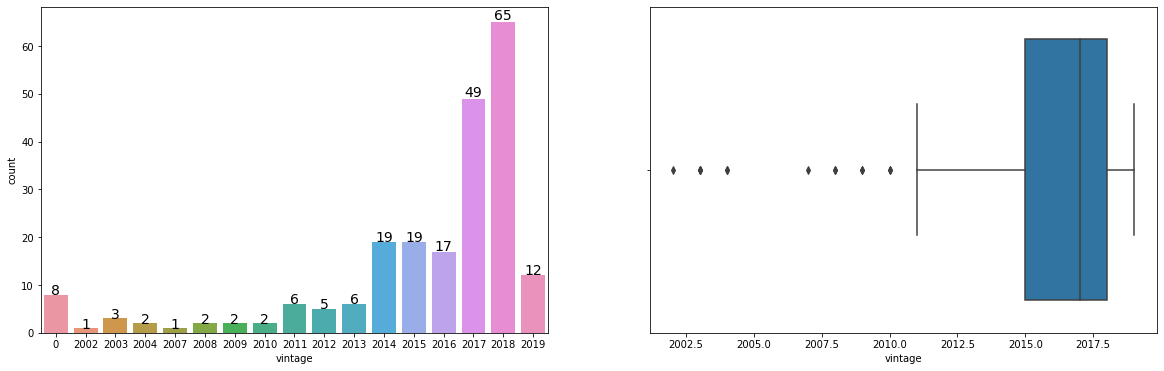

In [15]:
f, (ax, ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='vintage', data=df1, ax=ax)

sns.boxplot(x='vintage', data=df1[df1['vintage']>0], ax=ax2);

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center', fontsize=14)

The statistical description tells us that:

- Most wines are from the 2010-2019 vintage. 
- There are more wines from the 2018 vintage.
- There is no wine from the 2005 and 2006 vintage.

- Both variables `price_brl` and `price_usd` have a high standard deviation, which may point to outliers.

### Prices

In [16]:
# US prices summary
print(df1.price_usd.describe(), "\n")
print("Most expensive wine costs: USD $",df1.price_usd.max())
print("Most cheap wine costs: USD $", df1.price_usd.min())

us_mean = df1.price_usd.mean()

print(f"Price average: USD $ {us_mean:.2f}")

count     219.000000
mean      167.407808
std       243.873780
min         9.130000
25%        45.725000
50%        88.130000
75%       164.220000
max      1901.730000
Name: price_usd, dtype: float64 

Most expensive wine costs: USD $ 1901.73
Most cheap wine costs: USD $ 9.13
Price average: USD $ 167.41


In [17]:
print('Most expensive wine:\n')
df1[df1.price_usd == 1901.73]

Most expensive wine:



,Unnamed: 0,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
93,93,94,Domaine Ponsot Clos de La Roche Grand Cru Cuve...,Domaine Ponsot,France,Burgundy,2017,red,10992.0,1901.73


In [18]:
print('Most cheap wine:\n')
df1[df1.price_usd == 9.13]

Most cheap wine:



,Unnamed: 0,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
177,177,178,Cava Juvé & Camps Cinta Purpura Reserva Brut -...,Juvé & Camps,Spain,Penedès,0,sparkling,52.8,9.13


In [19]:
fig = px.scatter(df1, y='price_usd', x='region', title = 'Wine price (USD) x region', 
           template='plotly_white', marginal_y='histogram', marginal_x='histogram', color_discrete_sequence=['blue'])

fig.show()

In [20]:
px.scatter(df1, y='price_brl', x ='region', title = 'Wine price (BRL) x region', template='plotly_white', 
           marginal_y='histogram', marginal_x='histogram', color_discrete_sequence=['green'])



The scatterplot of the wine prices by regions shows us that:

- Burgundy, Bordeaux, and Rhone are the top 3 wine producing regions.

- Most wines cost less than 100 dollars (less than 500 reais) or are in a range of 100-700 dollars (range of 500- 4000 reais).

- The price scale, while US prices range from 0 to 2,000, BRL prices range from 0 to 11,000

>The most expensive wines are from:

- Burgundy: \$ 1901,73 (R$ 10992)

- Bordeaxu: \$ 1659,86 (R$ 9594)

- Ribera del Duero: \$ 863,67 (R$ 4992)

- Maipo: \$ 621,80 (R$ 3594)



It is important to note that there are several outliers in the regions of Bordeaux and Burgundy.

That is, there are wines from these regions that are increasing the average price of the wines from these regions. So, we can probably expect that these more expensive wines are from a high quality vintage and/or stored for a longer time while others inside the normal range are standardized products.

### Wine kinds

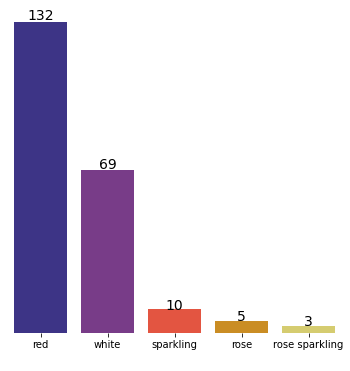

In [21]:
f, ax = plt.subplots(figsize=(6,6))
sns.countplot(x='kind', data=df1, ax=ax, order = df1['kind'].value_counts().index, palette='CMRmap');

ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Não Churn', 'Churn'], fontsize = 14)
ax.set_xlabel(' ')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center', fontsize=14)

In [22]:
fig = px.scatter(df1, x='kind', y='region', color='country')

fig.update_traces(marker={'size': 15})

fig.show()

The following wines predominate:

* red (132)
* white (69)
* sparkling (10)
* rose (5) 
* rose sparkling (3)

All countries in this dataset produce `red`, and only Chile and Argentina do not produce `white`.

But "sparkling", "rose" and "rose sparkling" are only produced in certain regions:

- `sparkling` - Penedès (Spain), Veneto (Italy), and Champagne (France)

- `rose sparkling` - Veneto and Champagne

- `rose` - Toscana (Italy) and Provence (France)


### Producers

In [23]:
fig = px.histogram(df1, x=df1.producer, color='country', 
                   title = 'Main producers')
fig.update_xaxes(categoryorder='total ascending')

fig.show()

In [24]:
# Checking the numbers of:

print("Producers: ", (len(df1.producer.value_counts())))
print("Countries: ", (len(df1.country.value_counts())))
print("Vintages:", (len(df1.vintage.value_counts())),"\n")

# Checking the main producers
print('Top 10 wine producers:\n')
df1.producer.value_counts().head(10)

Producers:  58
Countries:  6
Vintages: 17 

Top 10 wine producers:



Domaine Ponsot                    12
La Chablisienne                   10
Domaine Matrot                     9
Achaval Ferrer                     8
Pêra-Grave                         8
Olivier Riviere                    8
Casanova di Neri                   8
Eric Texier                        7
Domaine Pascal Prunier-Bonheur     7
Domaine Tessier                    5
Name: producer, dtype: int64

As we can see from the plot above we can point out that the leading wine producers are located in France, and there is a tie (from position 4-7) between Argentina, Portugal, Italy, and Spain.

## **Sales dataset**

In [25]:
df2

,Unnamed: 0,date,store,item_id,sales
0,0,2018-01-01,1,1,13
1,1,2018-01-02,1,1,11
2,2,2018-01-03,1,1,14
3,3,2018-01-04,1,1,13
4,4,2018-01-05,1,1,10
...,...,...,...,...,...
720066,720066,2020-12-27,3,219,71
720067,720067,2020-12-28,3,219,28
720068,720068,2020-12-29,3,219,75
720069,720069,2020-12-30,3,219,135


In [26]:
# Sales Dataframe summary
df2_summary = eda.df_info(df2)
display_all(df2_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Unnamed: 0,int64,Numerical,720071,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
date,object,Categorical,1097,"[2018-01-01, 2018-01-02, 2018-01-03, 2018-01-0...",0,0.0
store,int64,Numerical,3,"[1, 2, 3]",0,0.0
item_id,int64,Numerical,219,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
sales,int64,Numerical,185,"[13, 11, 14, 10, 12, 9, 7, 5, 16, 18]",0,0.0


We can see that:

- `date` has an object dtype, so we have to convert it to datetime dtype.

- There are no missing values
- As the order doesn't matter in `store` and `item`, we can convert to string dtype

Below we will convert `date`, `store`, and `item` to a proper dtype. Also, we will merge both dataframes (`df1` and `df2`) into `df_merged`, start some new visualizations and rename `item` as `item_id`. This last step is necessary because we want the dataframe merged to recognize `item_id` as just one feature, instead of a duplicated feature.

In [27]:
# Date dtype
df2['date'] = pd.to_datetime(df2['date'])

# Rename 'item'
df2.rename(columns={'item': 'item_id'}, inplace=True)

# Convert to string
df2.item_id = df2.item_id.astype(str)
df2.store = df2.store.astype(str)

In [28]:
# df2 Summary
df2_summary = eda.df_info(df2)
display_all(df2_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Unnamed: 0,int64,Numerical,720071,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
date,datetime64[ns],DateTime,1097,"[1514764800000000000, 1514851200000000000, 151...",0,0.0
store,object,Categorical,3,"[1, 2, 3]",0,0.0
item_id,object,Categorical,219,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
sales,int64,Numerical,185,"[13, 11, 14, 10, 12, 9, 7, 5, 16, 18]",0,0.0


In [29]:
df2

,Unnamed: 0,date,store,item_id,sales
0,0,2018-01-01,1,1,13
1,1,2018-01-02,1,1,11
2,2,2018-01-03,1,1,14
3,3,2018-01-04,1,1,13
4,4,2018-01-05,1,1,10
...,...,...,...,...,...
720066,720066,2020-12-27,3,219,71
720067,720067,2020-12-28,3,219,28
720068,720068,2020-12-29,3,219,75
720069,720069,2020-12-30,3,219,135


- The dataset period ranges from 2018-01-01 to 2020-12-31

In [30]:
round(df2.describe(), 2)

,Unnamed: 0,sales
count,720071.00,720071.00
mean,360035.00,70.59
std,207866.74,41.36
min,0.00,1.00
25%,180017.50,35.00
50%,360035.00,67.00
75%,540052.50,104.00
max,720070.00,196.00


In [31]:
df_merged = df2.merge(df1, on='item_id', how='right')

In [32]:
df_merged

,Unnamed: 0_x,date,store,item_id,sales,Unnamed: 0_y,name,producer,country,region,vintage,kind,price_brl,price_usd
0,0,2018-01-01,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,1,2018-01-02,1,1,11,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
2,2,2018-01-03,1,1,14,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
3,3,2018-01-04,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
4,4,2018-01-05,1,1,10,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720066,720066,2020-12-27,3,219,71,218,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84
720067,720067,2020-12-28,3,219,28,218,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84
720068,720068,2020-12-29,3,219,75,218,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84
720069,720069,2020-12-30,3,219,135,218,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84


In [33]:
round(df_merged.describe(), 2)

,Unnamed: 0_x,sales,Unnamed: 0_y,vintage,price_brl,price_usd
count,720071.00,720071.00,720071.00,720071.00,720071.00,720071.00
mean,360035.00,70.59,109.00,1942.18,967.62,167.41
std,207866.74,41.36,63.22,378.19,1406.37,243.32
min,0.00,1.00,0.00,0.00,52.80,9.13
25%,180017.50,35.00,54.00,2014.00,259.20,44.84
50%,360035.00,67.00,109.00,2017.00,509.40,88.13
75%,540052.50,104.00,164.00,2018.00,949.20,164.22
max,720070.00,196.00,218.00,2019.00,10992.00,1901.73


In [34]:
df3 = df_merged.copy()

In [35]:
df3.head()

,Unnamed: 0_x,date,store,item_id,sales,Unnamed: 0_y,name,producer,country,region,vintage,kind,price_brl,price_usd
0,0,2018-01-01,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,1,2018-01-02,1,1,11,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
2,2,2018-01-03,1,1,14,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
3,3,2018-01-04,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
4,4,2018-01-05,1,1,10,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75


In [36]:
df3.describe()

,Unnamed: 0_x,sales,Unnamed: 0_y,vintage,price_brl,price_usd
count,720071.00000,720071.000000,720071.000000,720071.000000,720071.000000,720071.000000
mean,360035.00000,70.587936,109.000083,1942.182543,967.617312,167.407801
std,207866.73718,41.356400,63.219244,378.189438,1406.368249,243.316691
min,0.00000,1.000000,0.000000,0.000000,52.800000,9.130000
25%,180017.50000,35.000000,54.000000,2014.000000,259.200000,44.840000
50%,360035.00000,67.000000,109.000000,2017.000000,509.400000,88.130000
75%,540052.50000,104.000000,164.000000,2018.000000,949.200000,164.220000
max,720070.00000,196.000000,218.000000,2019.000000,10992.000000,1901.730000


In [37]:
df3['total_amount'] = df3['price_usd'] * df3['sales']
df3.head()

,Unnamed: 0_x,date,store,item_id,sales,Unnamed: 0_y,name,producer,country,region,vintage,kind,price_brl,price_usd,total_amount
0,0,2018-01-01,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,763.75
1,1,2018-01-02,1,1,11,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,646.25
2,2,2018-01-03,1,1,14,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,822.50
3,3,2018-01-04,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,763.75
4,4,2018-01-05,1,1,10,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,587.50


It is also possible to evaluate the total amount of each wine sold. In order to do this, we are going to create the feature `total_amount`, in which is `price_usd` times `sales`.

In [38]:
df3.describe()

,Unnamed: 0_x,sales,Unnamed: 0_y,vintage,price_brl,price_usd,total_amount
count,720071.00000,720071.000000,720071.000000,720071.000000,720071.000000,720071.000000,720071.000000
mean,360035.00000,70.587936,109.000083,1942.182543,967.617312,167.407801,12136.539536
std,207866.73718,41.356400,63.219244,378.189438,1406.368249,243.316691,22347.832337
min,0.00000,1.000000,0.000000,0.000000,52.800000,9.130000,9.130000
25%,180017.50000,35.000000,54.000000,2014.000000,259.200000,44.840000,2252.250000
50%,360035.00000,67.000000,109.000000,2017.000000,509.400000,88.130000,5050.870000
75%,540052.50000,104.000000,164.000000,2018.000000,949.200000,164.220000,11423.970000
max,720070.00000,196.000000,218.000000,2019.000000,10992.000000,1901.730000,285259.500000


In [39]:
round(df3.loc[:,['sales', 'total_amount']].describe(),2)

,sales,total_amount
count,720071.00,720071.00
mean,70.59,12136.54
std,41.36,22347.83
min,1.00,9.13
25%,35.00,2252.25
50%,67.00,5050.87
75%,104.00,11423.97
max,196.00,285259.50


In [40]:
top_wines = df3.groupby('name')['total_amount'].sum().sort_values(ascending=False).iloc[0:20]

fig = px.bar(df3, x=top_wines.values, 
             y=top_wines.index,
             color_discrete_sequence=['#4AD0EB'],
             title = 'Top Wine revenue')

fig.show()

In [41]:
top_sales = df3.groupby('name')['sales'].sum().sort_values(ascending=False).iloc[0:20]

fig = px.bar(df3, x=top_sales.values, 
             y=top_sales.index, 
             color_discrete_sequence=['#21849F'],
             title = 'Top Wine Sales')

fig.show()

The most expensive wine is the best seller and the top 3 are Domaine Ponsot. However, this doesn't mean that every expensive wine returns a bigger revenue, for instance, Château Pavie is is the fourth best-selling wine however it is in position 17 in top sales. Another example is the second best seller wine Potensa it is not even in the top 20 wine revenue.

In [42]:
prod = df3.groupby('producer')['price_usd'].sum().sort_values(ascending=False).iloc[0:20]

fig = px.bar(df3, x=prod.values, 
             y=prod.index, 
             color_discrete_sequence=['#8137C4'],
             title = 'Most expensive Producers')

fig.show()

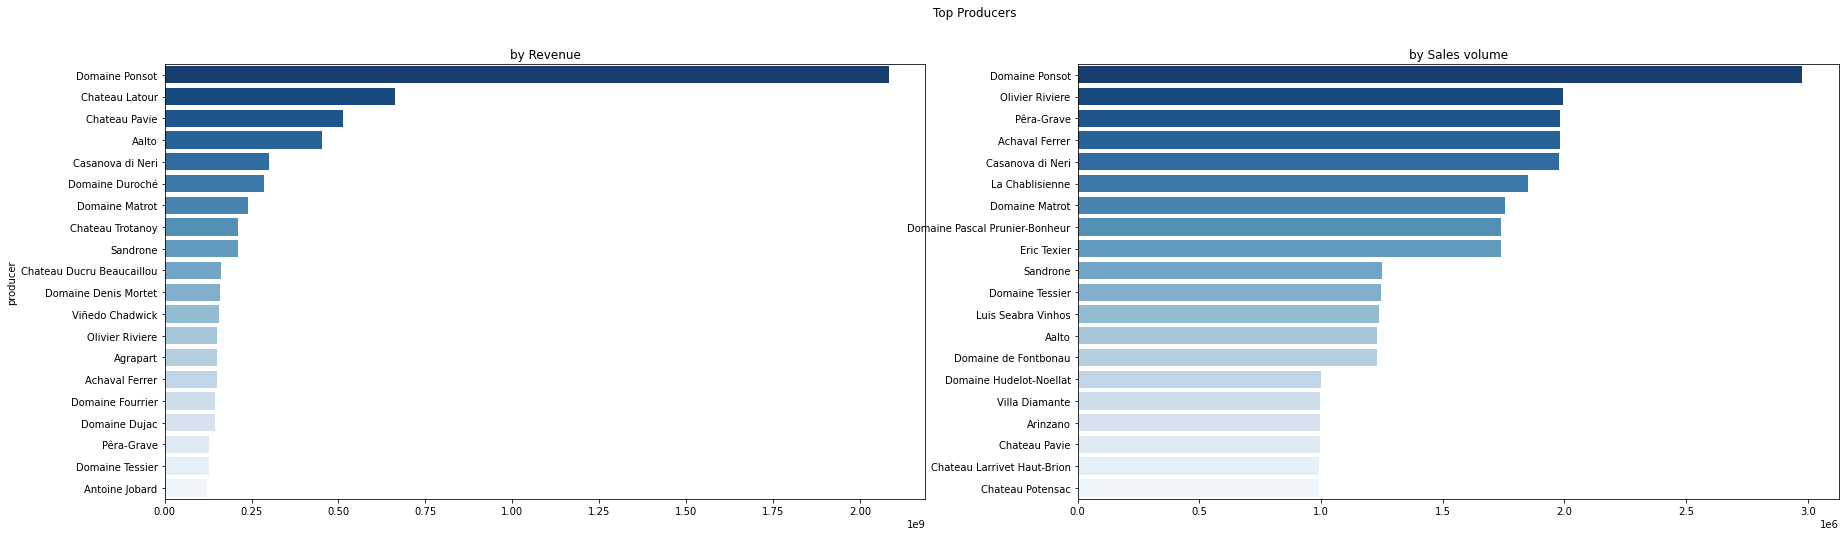

In [43]:
f, ax = plt.subplots(1, 2, figsize= (30,8))
f.suptitle("Top Producers")

# ax[0]

top_wines = df3.groupby('producer')['total_amount'].sum().sort_values(ascending=False).iloc[:20]
sns.barplot(y=top_wines.index, x=top_wines.values, palette="Blues_r", ax=ax[0])
ax[0].set_title('by Revenue')

# ax[1]

top_sales = df3.groupby('producer')['sales'].sum().sort_values(ascending=False).iloc[:20]
sns.barplot(y=top_sales.index, x=top_sales.values, palette='Blues_r')
ax[1].set_ylabel(' ')

ax[1].set_title('by Sales volume')

plt.show()


Although the Chateau producer appears in the top 20 revenue, they are near the bottom of the top sales list. And again, the Domaine Ponsot shows on the top of both lists again.

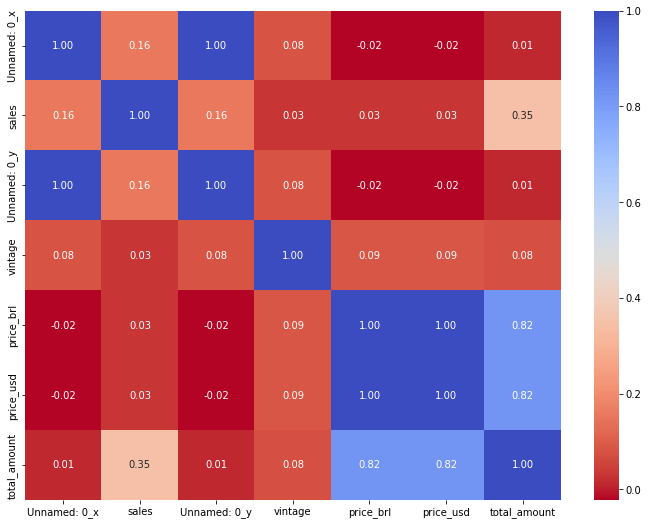

In [44]:
corr = df3.corr()

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap = 'coolwarm_r')
plt.show()

The correlation heatmap doesn't show much information

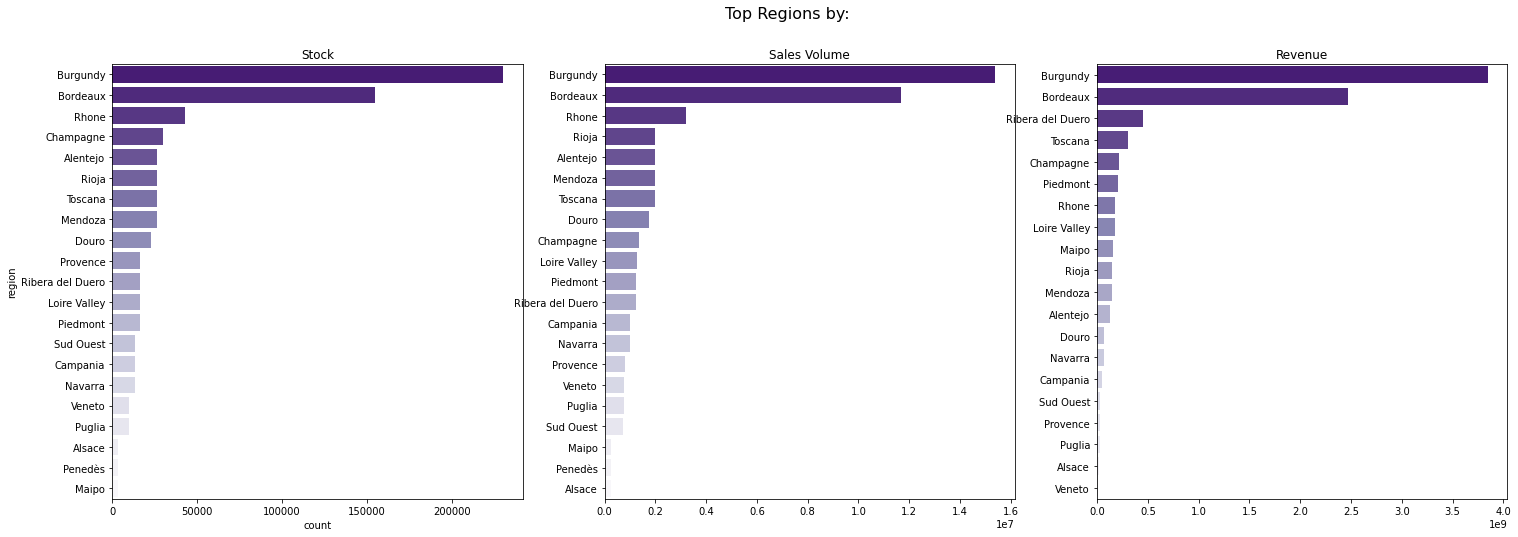

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (25,8))
fig.suptitle('Top Regions by:', fontsize=16)

sns.countplot(y=df3.region, order = df3.region.value_counts().index, ax=ax[0], palette="Purples_r")
ax[0].set_title('Stock')

region = df3.groupby('region')['sales'].sum().sort_values(ascending=False)
sns.barplot(y=region.index, x=region.values, palette="Purples_r", ax=ax[1])
ax[1].set_title('Sales Volume')
ax[1].set_ylabel(' ')

region_rev = df3.groupby('region')['total_amount'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(y=region_rev.index, x=region_rev.values,palette="Purples_r", ax=ax[2])
ax[2].set_title('Revenue')
ax[2].set_ylabel(' ')

plt.show()

We can see that the top 3 regions offered are the same ones that sell the most. This pattern follows the supply and demand point of view because you only produce a lot of a certain product if people really want to buy it.

A fact calls our attention - The region Champagne is the fourth region with more wines available and the ninght region with most sales. The others wine seems right, with a few changes in position.

Although Ribera del Duero and Toscana are in the middle position of sales and stock, they are at the top in revenue.



## Datetime

We are going to explore how sales are influenced daily. 

First, we will extract the days of the week from datetime. Pandas assume that Monday = 0 and Sunday = 6. With this idea, we are going to create a new feature: `is_weekend?`, so when it's a weekday (0-4) it value will be False, and when it's a weekend (5 or 6) the value will be True. 

In [46]:
# Feature creation - weekend = || 1 weekday = 0
df3['dayofweek'] = df3['date'].dt.weekday

df3["is_weekend?"] = df3['dayofweek'] >=5

In [47]:
# Label encoding 'is_weekend'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df3["is_weekend?"] = le.fit_transform(df3["is_weekend?"])

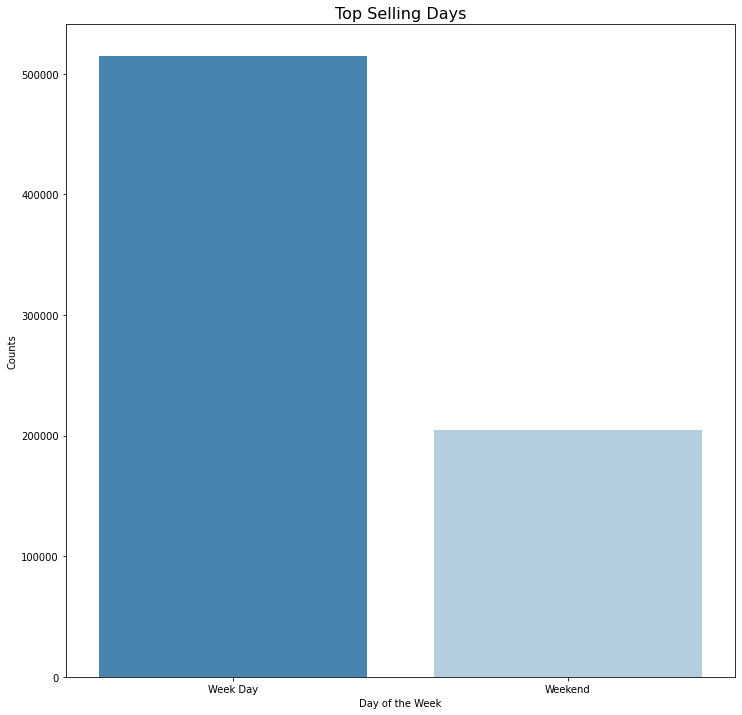

"is_weekend" value counts:



0    515237
1    204834
Name: is_weekend?, dtype: int64

In [48]:
# Top Selling Days plot
f, ax = plt.subplots(figsize=(12,12))

sns.countplot(x=df3["is_weekend?"], palette="Blues_r", ax=ax)

plt.ylabel("Counts")
plt.xlabel("Day of the Week")
ax.set_xticklabels(['Week Day', 'Weekend'])
plt.title('Top Selling Days', fontsize=16)

plt.show()

print('"is_weekend" value counts:\n')
df3["is_weekend?"].value_counts()

In [49]:
increase = round(515237/204834, 2)
print(f'There is a {increase} in sales on weekdays ')

There is a 2.52 in sales on weekdays 


We can clearly see that sales rises on weekdays by a factor of 2.52

In [50]:
df3.head()

,Unnamed: 0_x,date,store,item_id,sales,Unnamed: 0_y,name,producer,country,region,vintage,kind,price_brl,price_usd,total_amount,dayofweek,is_weekend?
0,0,2018-01-01,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,763.75,0,0
1,1,2018-01-02,1,1,11,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,646.25,1,0
2,2,2018-01-03,1,1,14,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,822.50,2,0
3,3,2018-01-04,1,1,13,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,763.75,3,0
4,4,2018-01-05,1,1,10,0,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,587.50,4,0


# **Demand Forecast**

For our demand forecast, we will use the Prophet, a tool developed by Facebook. According to the own [website](https://facebook.github.io/prophet/): 

> *Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.*

> *It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well*

So, in a nutshell, Prophet is a robust tool to predict times series, even though there are large seasonal differences.

### Times Series - stationary x non-stationary
 
A Times Series TS has to be stationary as a necessary requirement to make forecasts. In an easy way, stationary means that **the mean, variance, and covariance remain constant over** the time dimension. Let's see an example below from Analytics Vidhya of three non-stationary TS:

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>


There is an upward trend in the first plot, so the mean is increasing as time moves on. The second plot shows that the variance is interfering with its amplitude. The last one displays a characteristic behavior when the covariance changes as a function of time. Non-stationary TS are unpredictable and cannot be modeled or forecasted. Source: [Investopedia](https://www.investopedia.com/articles/trading/07/stationary.asp#:)

### How does look like a Stationary TS?

A stationary TS looks like the figure below, with constant mean, variance, and covariance:

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="50%"></center>


### How to check if a TS is stationary?

- **Checking the plots** - In many instances, during the exploratory data analysis you can visually identify;

- **Summary statistics** - You can harvest statistical information of the TS and check for evidence of stationarity;

- **Statistical tests** - These tests can tell us if a TS is stationary or not based on scientific methods. In this project, we will use the Augmented Dickey-Fuller (ADF) test

### Augmented Dickey-Fuller (ADF) test

This test is one of the most used statistical tests for time series. Its null and alternative hypotheses are:

- The Null Hypothesis (**H0**) means that the TS **is non-stationary** and it has time dependence;

- The Alternative Hypothesis (**H1**) rejects the null hypothesis, meaning the **TS is stationary**.

When the p-value is less than or equal a certain significance level, we typically reject the null hypothesis H0. This level is usually equal to 0.01 (5%), 0.05 (5%) or even 0.1 (10%).

The smaller the p-value, the more evidence we have against the null hypothesis. For instance, is a p-value = 0.05 is used, we reject H0 with a 95% confidence level.

Let's summarize it: if the test value is above, we fail to reject the null hypothesis. **So if the null hypothesis can't be reject, we propably have a time dependece, or, a non-stationary TS.** Caution note: this does mean that H0 is true, but it means that this experiment found no evidence to reject it. 
Let's apply these concepts.

In [51]:
# Installing prophet
!pip install prophet -q

In [52]:
from prophet import Prophet
import logging

from statsmodels.tsa.stattools import adfuller

from prophet.plot import add_changepoints_to_plot

from sklearn.metrics import mean_absolute_error

Preparing data

We will need to ajust the data so it can be properly used on Prophet. It needs:

- A date column named `ds`
- A value column (in this case, sales) you want to forecast named `y`

Let's start.

In [53]:
# Extracting the two columns
df_ts = df3.groupby('date', as_index=False)['sales'].sum()

# Datetime format
df_ts['date'] = pd.to_datetime(df_ts['date'])

# Renaming columns
df_ts.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Dropping error row
df_ts.drop(0, inplace=True)

In [54]:
df_ts

,ds,y
1,2018-01-01,43432
2,2018-01-02,43181
3,2018-01-03,43298
4,2018-01-04,42216
5,2018-01-05,42001
...,...,...
1092,2020-12-27,45931
1093,2020-12-28,42754
1094,2020-12-29,43804
1095,2020-12-30,44546


In [55]:
df_ts.to_csv('wine_sales_forest.csv')

In [56]:
# https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [57]:
# https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a

In [58]:
# https://www.investopedia.com/articles/trading/07/stationary.asp#:

In [59]:
# Adfuller
X = df_ts.y

result = adfuller(X)
print('Augmented Dickey-Fuller')
print(f'Statistical Test: {result[0]:.4f}')
print(f'p-value: {result[1]:.10f}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'\t{key}: {value:.4f}')

Augmented Dickey-Fuller
Statistical Test: -2.3601
p-value: 0.1533303754
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


We got p-`value` = 0.15, that means we can reject the null hypothesis with a confidence level of around 85%

It's useful to remember that when we are working with times series: the longer we are trying to forecast, the less confidence we will get in our results. Hence, we will be making forecasts for a period of 12 months.

In [60]:
# Tnstantiating the model
b = Prophet()
# b = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)

# Training the model
b.fit(df_ts)

# Making predictions
future = b.make_future_dataframe(periods=12, freq='M')
forecast = b.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfqitk9we/x22m538y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfqitk9we/1yi2efmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90686', 'data', 'file=/tmp/tmpfqitk9we/x22m538y.json', 'init=/tmp/tmpfqitk9we/1yi2efmd.json', 'output', 'file=/tmp/tmpfqitk9we/prophet_modelparuxmi9/prophet_model-20230103000838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:
df_ts

,ds,y
1,2018-01-01,43432
2,2018-01-02,43181
3,2018-01-03,43298
4,2018-01-04,42216
5,2018-01-05,42001
...,...,...
1092,2020-12-27,45931
1093,2020-12-28,42754
1094,2020-12-29,43804
1095,2020-12-30,44546


In [62]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,42371.164781,40873.637029,43946.377075
1,2018-01-02,42662.710988,41073.240880,44146.837209
2,2018-01-03,42993.213360,41412.497743,44501.546495
3,2018-01-04,43464.037855,41987.415080,45040.058617
4,2018-01-05,44105.305916,42512.164138,45616.953269
...,...,...,...,...
1103,2021-08-31,47794.617510,46294.082160,49517.802704
1104,2021-09-30,47961.123313,46484.276087,49482.923014
1105,2021-10-31,47046.090375,45382.754050,48588.787461
1106,2021-11-30,46046.800670,44496.017622,47648.246189


When we call forecast, this function will show us a dataframe structure with a lot of information, but in order to facilitate our understanding, let's focus on the features below:

- `ds` is the timestamp of every entry
- `yhat` is the forecasted value,

- `yhat_lower` is the lower of the confidence level for the forecast
- `yhat_upper` is the upper of the confidence level for the forecast

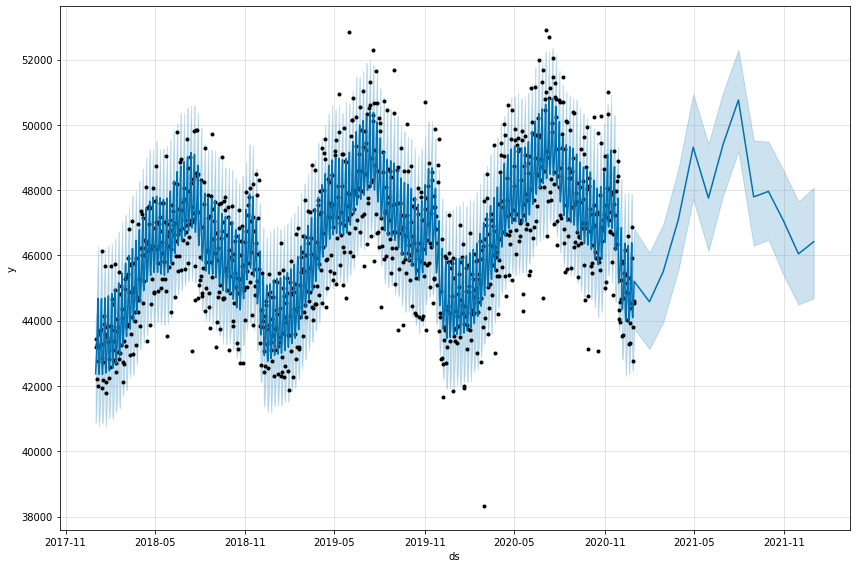

In [63]:
# plot
f, ax = plt.subplots(figsize=(12,8))
fig = b.plot(forecast, ax=ax)

This is the typical times series plot, let's analyze it. The black dots is the original data, the blue line is the forecast model, the light blue area represents the confidence interval. We can enhance it by using `add_changepoints_to_plot`. This will add a solid red line which represents the trend with all seasonality removed and the vertical dashed lines are the changepoints that the model idenfied where the trend change.

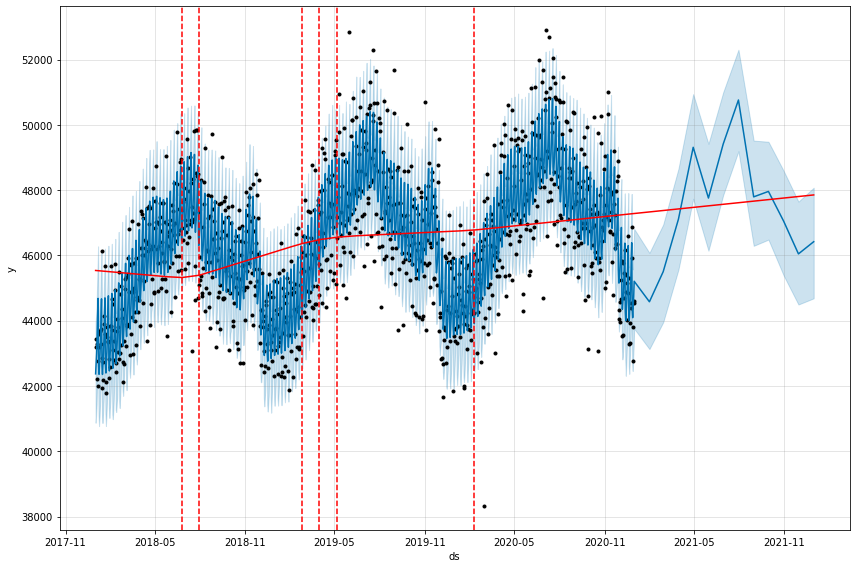

In [64]:
a = add_changepoints_to_plot(fig.gca(), b, forecast)

fig

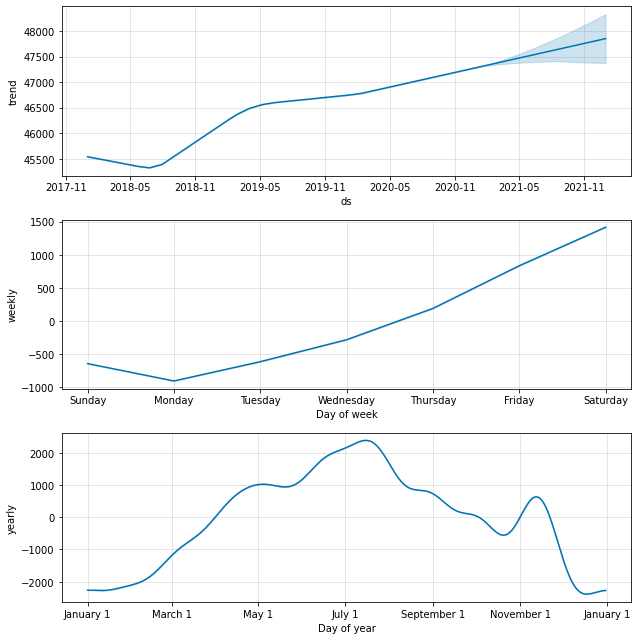

In [65]:
b.plot_components(forecast);

These forecasts are really good? To make sure, we can use the following metric:

Mean Absolute Error (MAE) - Is the absolute value for the forecast error compared to the actual series.

In [66]:
pred = forecast['yhat'][:1097].values

In [67]:
y_true = df_ts['y'].values
y_pred = forecast['yhat'][:1096].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual

MAE: 939.180


Though the results may look good, there is a big MAE. Let's make this model a baseline and try a different approach: turning the series into stationary and run in again.

## Stationary Times Series

To transform a times series into stationary, first, we are going to need to: remove the trend and seasonality in the original data. In order to do this, some techiniques can be applied. 

A first step would be to apply a log function to reduce the magnitude of the TS values and then substract the moving average of a certain period from the log of TS.

In [68]:
# Data preparation

df_ts.index = pd.to_datetime(df_ts['ds'])
df_ts.drop('ds', axis=1, inplace=True)
df_ts.head()

,y
ds,
2018-01-01,43432
2018-01-02,43181
2018-01-03,43298
2018-01-04,42216
2018-01-05,42001


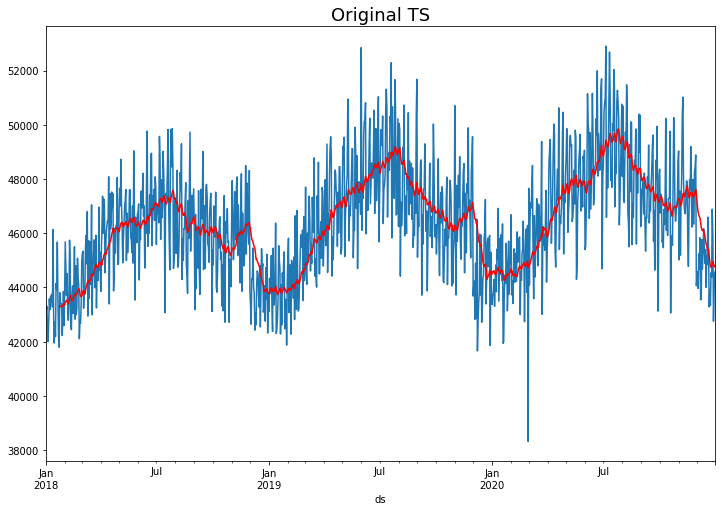

In [69]:
# Checking the original plot

ma = df_ts.rolling(24).mean()

f, ax = plt.subplots(figsize=(12,8))
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.title('Original TS', fontsize=18)

plt.show();

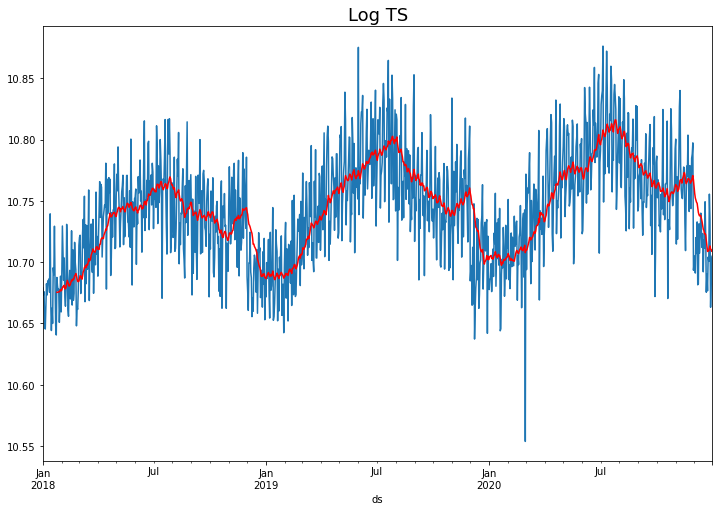

In [70]:
# Applying log

df_log = np.log(df_ts)
ma_log = df_log.rolling(24).mean()

f, ax = plt.subplots(figsize=(12,8))

df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.title('Log TS', fontsize=18)

plt.show()

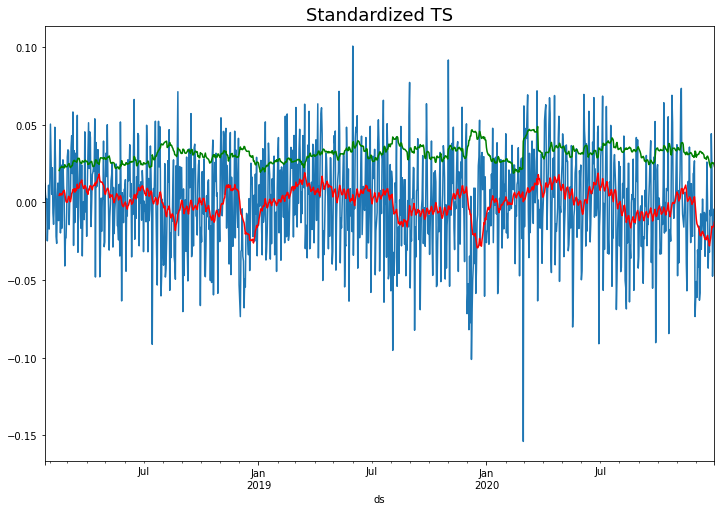

In [71]:
# Substracting the log mean from data
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(24).mean()
std_sub = df_sub.rolling(24).std()

f, ax = plt.subplots(figsize=(12,8))

df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='r')
std_sub.plot(ax=ax, legend=False, color='g')
plt.title('Standardized TS', fontsize=18)

plt.show()

In [72]:
# ADF of log TS

X_sub = df_sub.y.values

result_sub = adfuller(X_sub)

print('Log df - Augmented Dickey-Fuller')
print(f'Statistical Test: {result_sub[0]:.4f}')
print(f'p-value: {result_sub[1]:.10f}')
print('Critical Values:')
for key, value in result_sub[4].items():
  print(f'\t{key}: {value:.4f}')

Log df - Augmented Dickey-Fuller
Statistical Test: -5.6436
p-value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


Now we have a really lower p-value, that means that the confidence level is much higher to consider the times series to be stationary!

Another technique that we can use enhance these results is differentiation. Let's check this out.

## Differentiation

It is possible to further increase ADF performance by calculating the difference between two possible observations

$$value(t) = observation(t) - observation(t - 1)$$

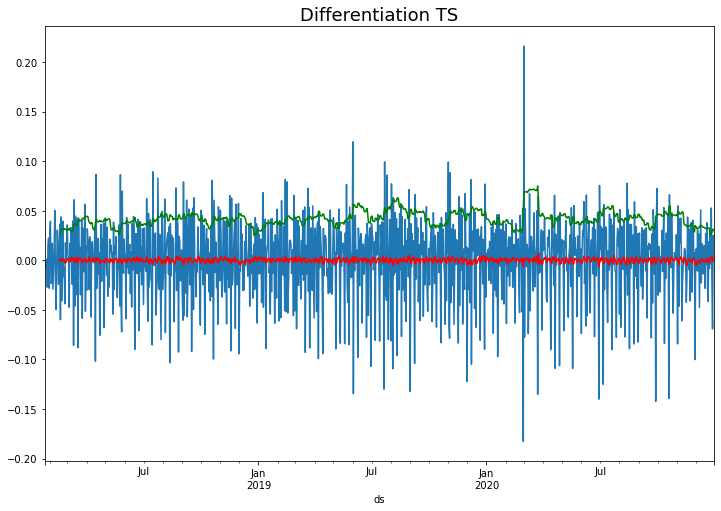

df_diff - Augmented Dickey-Fuller
Statistical Test: -11.3037
p-value: 0.0000000000
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


In [73]:
# Differentiation df (df_diff)

df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(24).mean()
std_diff = df_diff.rolling(24).std()

# df_diff plot
f, ax = plt.subplots(figsize=(12,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.title('Differentiation TS', fontsize=18)
plt.show()

# ADF
X_diff = df_diff.y.dropna().values

result_diff = adfuller(X_diff)

print('df_diff - Augmented Dickey-Fuller')
print(f'Statistical Test: {result_diff[0]:.4f}')
print(f'p-value: {result_diff[1]:.10f}')
print('Critical Values:')
for key, value in result_diff[4].items():
  print(f'\t{key}: {value:.4f}')


In this case, it improved the p-value, though we already had good results previously. Let's move forward with the log TS. First, as we are working with a dataset obtained in Brazil, let's set the holidays to match the country.

In [74]:
# To Prophet format
df_log.reset_index(inplace=True)

In [75]:
# Instantiating model

m = Prophet()
m.add_country_holidays(country_name = 'BR')

# Training the model
m.fit(df_log)

# Making predictions
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfqitk9we/2an3h9jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfqitk9we/od4ttcn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1617', 'data', 'file=/tmp/tmpfqitk9we/2an3h9jy.json', 'init=/tmp/tmpfqitk9we/od4ttcn0.json', 'output', 'file=/tmp/tmpfqitk9we/prophet_model69208ohf/prophet_model-20230103000843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
# Brazil holidays
m.train_holiday_names

0                                        Ano novo
1                                      Tiradentes
2                         Dia Mundial do Trabalho
3                         Independência do Brasil
4                         Nossa Senhora Aparecida
5                                         Finados
6                        Proclamação da República
7                                           Natal
8                               Sexta-feira Santa
9                                          Páscoa
10                                 Corpus Christi
11    Quarta-feira de cinzas (Início da Quaresma)
12                                       Carnaval
dtype: object

In [77]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,10.658532,10.625302,10.693658
1,2018-01-02,10.664796,10.631448,10.699618
2,2018-01-03,10.671987,10.637210,10.705856
3,2018-01-04,10.682647,10.648588,10.713941
4,2018-01-05,10.695725,10.662583,10.730814
...,...,...,...,...
1103,2021-08-31,10.771484,10.732977,10.810088
1104,2021-09-30,10.774499,10.737908,10.810973
1105,2021-10-31,10.752676,10.713590,10.793001
1106,2021-11-30,10.729812,10.687201,10.767716


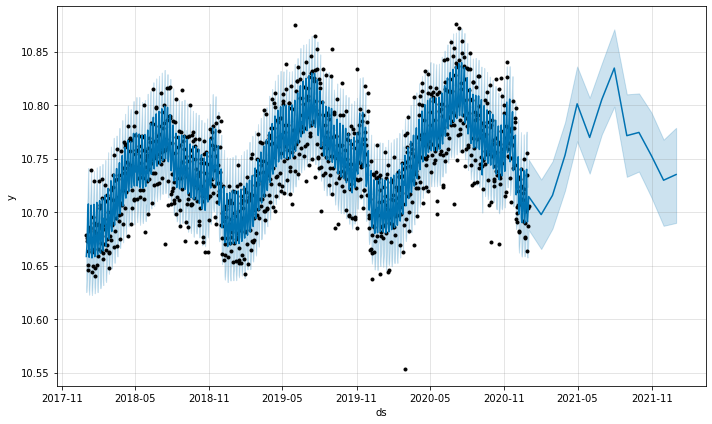

In [78]:
# plotting forecast
fig = m.plot(forecast)

In [79]:
# plot expected vs actual
y_true = df_log['y'].values
y_pred = forecast['yhat'][:1096].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


MAE: 0.020


## **Final TS**

Now we have good results, with very low errors. We just need to fix one detail: undo the log transformation, that is, change the log scale to the original scale. So, let's bring it back. In order to do so, we will create a final dataset.

In [80]:
# Complete Dataframe

df_final = forecast[['ds', 'yhat']]
df_final.head()

,ds,yhat
0,2018-01-01,10.658532
1,2018-01-02,10.664796
2,2018-01-03,10.671987
3,2018-01-04,10.682647
4,2018-01-05,10.695725


In [81]:
df_final['sales_log'] = df_log['y']
df_final.head()

<ipython-input-81-cd1c427c7c5a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,yhat,sales_log
0,2018-01-01,10.658532,10.678952
1,2018-01-02,10.664796,10.673156
2,2018-01-03,10.671987,10.675862
3,2018-01-04,10.682647,10.650555
4,2018-01-05,10.695725,10.645449


In [82]:
# Getting the values back to their original scale
df_final['sales'] = np.exp(df_final['sales_log'].values)
df_final['sales_pred'] = np.exp(df_final['yhat'].values)
round(df_final.head(10), 2)

<ipython-input-82-19f3f84a54cc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-19f3f84a54cc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,yhat,sales_log,sales,sales_pred
0,2018-01-01,10.66,10.68,43432.0,42554.12
1,2018-01-02,10.66,10.67,43181.0,42821.51
2,2018-01-03,10.67,10.68,43298.0,43130.56
3,2018-01-04,10.68,10.65,42216.0,43592.77
4,2018-01-05,10.70,10.65,42001.0,44166.64
5,2018-01-06,10.71,10.66,42767.0,44696.83
6,2018-01-07,10.66,10.68,43582.0,42716.66
7,2018-01-08,10.66,10.67,43182.0,42524.40
8,2018-01-09,10.66,10.68,43680.0,42755.67
9,2018-01-10,10.67,10.68,43686.0,43065.57


In [83]:
df_final.to_csv('wine_sales_forecast_final.csv')

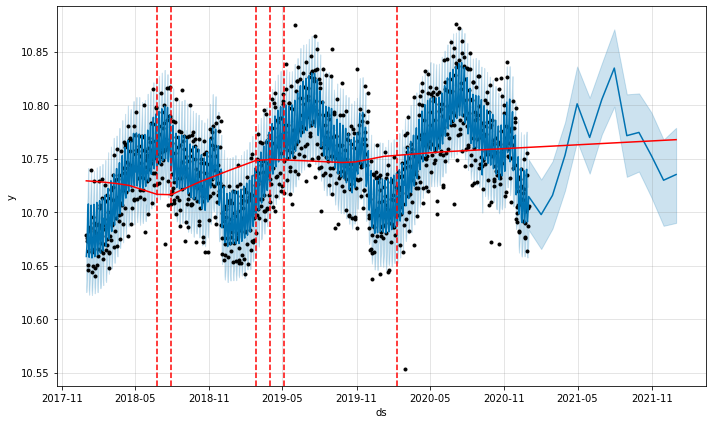

In [84]:
a = add_changepoints_to_plot(fig.gca(), b, forecast)

fig

It is possible to see a pattern, the sales increase and decreases is some moments marked by the change points, the trend aims to a little increase in sale. The forecast predicts that sales will fall at the beginning of the year and then rise until month 7 and then decrease again.

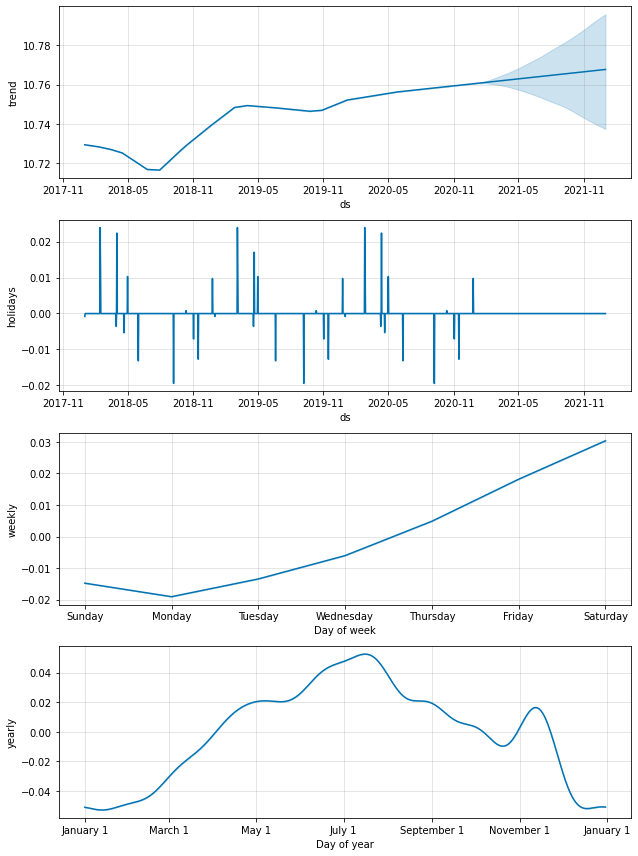

In [85]:
m.plot_components(forecast);

In [86]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_final["ds"], y=df_final["sales"], name="Actual Sales"))

fig.add_trace(go.Scatter(
    x=df_final["ds"], y=df_final["sales_pred"], name="Predicted Sales"))

fig.update_layout(title_text="Wine Sales: Actual x Predicted")
fig.show()

fig.write_html("Wine_Sales_Actual_Predicted.html")

With the plot above, we can that our model is more optimistic, being closer to the upper limits than to the lower limits, but in general at a midpoint.

If we are trying to predict optimistic or pessimistic forecasts, we can focus on `yhat_upper` or `yhat_lower`, respectively.

# Conclusions

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Demand%20Forecasting%20-%20Wine%20Store/pexels-barrels.jpg?raw=true.jpg" width="80%"></p>
<p align=center>Fonte: Pexels

We developed an exploratory data analysis (EDA) of both datasets, the catalog, and the sales report, and then used Times Series to predict future sales over a period of 12 months. 

The EDA shows us that most wines are from a vintage of 2018 and 2017. The most expensive wine was the (Domaine Ponsot Clos de La Roche Grand Cru …) costing 1901 dollars (10992 reais) and the cheapest wine was (Cava Juvé & Camps Cinta Purpura Reserva …) costing 9.13 dollars (52.8 reais).

Red wine followed by white wine were the most produced wines. The top 3 wine producers are Domaine Ponsot, La Chablisienne, and Domaine Matrot, from these, the Domaine wines are in the top sale and also expensive (Chateau as well). Major regions included Burgundy, Bordeaux, and the Rhône and are also among the top sellers.

The sales included data from 2018 to 2020. Most wines are sold on weekdays, considering that sales rise from Monday until Saturday and usually fall on Sunday. The year analysis points out that most sales occur from March to the end of November.  

The times series model trained has good accuracy (good match of real and predicted results) and has few error rates (MAE = 0.020). The trendline from predicted sales claims that should be a smooth rise in sales for the next year, with an expected raising from March, a drop around April, and then a raise from May until August, and then another fall to a seeming baseline.

Overall, these results should not be understood as a certain prediction for the next year, but instead as an estimated approach. Another factor not to be forgotten is that the longer we are trying to forecast, the more likely to go wrong. With the information obtained, we can expect a raise in sales from Monday to Saturday, and a yearly rise from March to November. This way, product inventory, and logistics can be improved based on the best-selling wines and peak selling periods. Also, by taking note of periods with fewer sales, it may be possible to run promotions and targeted marketing campaigns. 



**Images**: 


<a href="https://www.freepik.com/free-vector/wine-bottle-glass-cup-splashes_5596100.htm#query=wine&position=46&from_view=search&track=sph">Image by gstudioimagen</a> on Freepik

<a href="https://www.freepik.com/free-vector/demand-analysts-shaking-hands-from-laptops-screens-planning-future-demand-demand-planning-demand-analytics-digital-sales-forecast-concept-illustration_11668571.htm#query=sales&position=4&from_view=search&track=sph">Image by vectorjuice</a> on Freepik

<a href="https://www.freepik.com/free-photo/uncorking-bottle-red-wine_3222290.htm#query=corkscrew&from_query=corkskrew&position=1&from_view=search&track=sph">Image by rawpixel.com</a> on Freepik

<a href="https://www.freepik.com/free-photo/stack-books-yellow-background-education-concept-3d-rendering_24803430.htm#query=dictionary&position=3&from_view=search&track=sph">Image by mamewmy</a> on Freepik

https://www.pexels.com/

Photo by Henry & Co.: https://www.pexels.com/photo/gray-barrel-1151243/